<a href="https://colab.research.google.com/github/PDeySarkar103/XAS/blob/main/XAS_SDSS_Classification_using_ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Datasets

In [3]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.7/909.7 kB 27.9 MB/s eta 0:00:00


In [4]:
from astroquery.sdss import SDSS

query = """SELECT TOP 500000
p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
 p.run, p.rerun, p.camcol, p.field,
s.specobjid, s.class, s.z as redshift,
s.plate, s.mjd, s.fiberid
FROM PhotoObj AS p
JOIN SpecObj AS s ON s.bestobjid = p.objid
"""
res = SDSS.query_sql(query, data_release=18)
df = res.to_pandas()
df.to_csv('SDSS18.csv')

In [ ]:
#from google.colab import files
#uploaded=files.upload()

In [ ]:
#df=pd.read_csv('SDSS_DR18.csv')

In [5]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237660961324990835,129.628095,29.059057,24.91692,21.27143,19.59078,18.90489,18.49419,3606,301,2,37,1.427672e+18,b'GALAXY',0.320806,1268,52933,113
1,1237660961324794071,129.199021,28.701754,23.01294,20.46514,18.83662,18.16925,17.73204,3606,301,2,34,1.427681e+18,b'GALAXY',0.346654,1268,52933,144
2,1237667431716028643,168.726601,27.680925,21.65936,21.73216,21.61713,21.60229,21.24192,5112,301,6,385,1.278691e+19,b'QSO',1.007728,11357,58522,220
3,1237662341081924048,230.213267,33.302082,22.83827,19.99337,18.49053,17.86074,17.50969,3927,301,4,17,5.313295e+18,b'GALAXY',0.272813,4719,55736,630
4,1237662341092540766,252.654652,19.732789,25.19646,21.77507,20.79209,19.86567,19.89753,3927,301,4,179,4.705197e+18,b'GALAXY',0.594867,4179,55684,223


In [6]:
df.shape

(500000, 18)

# EDA(Exploratory Data Analysis)

In [7]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      500000 non-null  int64  
 1   ra         500000 non-null  float64
 2   dec        500000 non-null  float64
 3   u          500000 non-null  float64
 4   g          500000 non-null  float64
 5   r          500000 non-null  float64
 6   i          500000 non-null  float64
 7   z          500000 non-null  float64
 8   run        500000 non-null  int64  
 9   rerun      500000 non-null  int64  
 10  camcol     500000 non-null  int64  
 11  field      500000 non-null  int64  
 12  specobjid  500000 non-null  float64
 13  class      500000 non-null  object 
 14  redshift   500000 non-null  float64
 15  plate      500000 non-null  int64  
 16  mjd        500000 non-null  int64  
 17  fiberid    500000 non-null  int64  
dtypes: float64(9), int64(8), object(1)
memory usage: 68.7+ MB


In [9]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.237665e+18,173.639126,24.427243,21.483184,20.033481,19.207025,18.577053,18.195378,4495.884510,301.0,3.225962,183.914120,5.739837e+18,0.573599,5097.891612,55573.895058,439.923774
std,8.548568e+12,95.816608,19.765381,77.653865,76.332500,63.389213,67.966745,72.258321,1990.370004,0.0,1.616161,140.047968,3.286507e+18,0.725555,2918.986886,1799.853381,273.469094
min,1.237646e+18,0.000095,-18.865961,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.010932,266.000000,51608.000000,1.000000
25%,1.237658e+18,126.763743,6.451445,20.321002,18.902515,18.045607,17.641690,17.378857,2986.000000,301.0,2.000000,83.000000,2.858434e+18,0.066315,2538.750000,54252.000000,209.000000
50%,1.237664e+18,173.348559,23.269165,22.183665,21.089705,20.101550,19.378165,18.974650,4263.000000,301.0,3.000000,148.000000,5.616028e+18,0.425040,4988.000000,55882.000000,417.000000
75%,1.237670e+18,229.731250,39.994498,23.709492,22.123643,21.007832,20.330500,19.869112,5598.000000,301.0,5.000000,246.000000,8.176500e+18,0.688042,7262.000000,56711.000000,638.000000
max,1.237681e+18,359.999810,84.490494,32.781390,31.602240,31.990100,32.141470,29.514250,8162.000000,301.0,6.000000,1000.000000,1.412694e+19,7.051930,12547.000000,58932.000000,1000.000000


In [10]:
df['class'].nunique() # Shows no. of unique entries in the class column

3

In [11]:
df['class'].unique() # The unique elements in class column

array([b'GALAXY', b'QSO', b'STAR'], dtype=object)

In [12]:
df['class'].value_counts()

b'GALAXY'    305785
b'STAR'      101455
b'QSO'        92760
Name: class, dtype: int64

# Visualization of Data

## Histogram plot

In [13]:
sns.set(style='darkgrid',palette='dark')

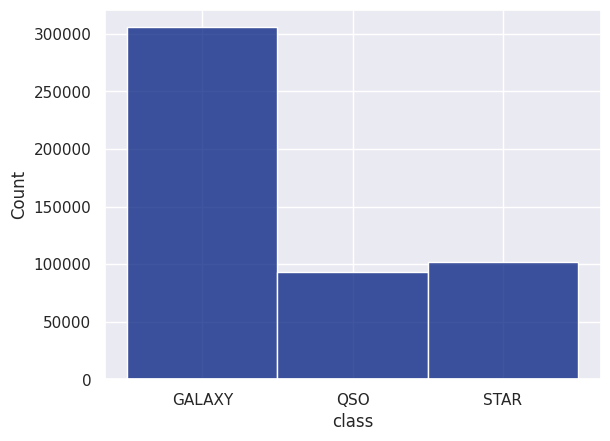

In [14]:
sns.histplot(x=df['class'])
plt.show()

## Correlation Matrix

<Axes: >

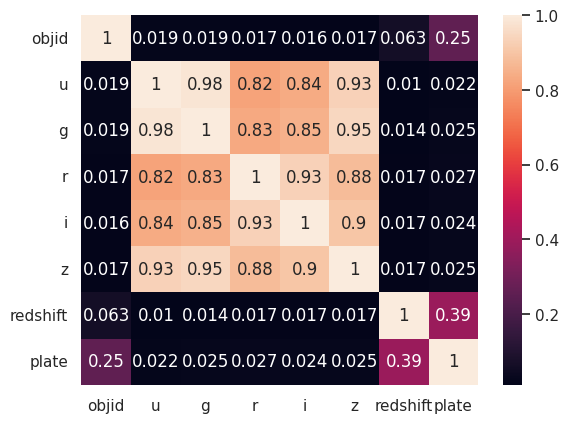

In [15]:
# Heatmap for expressing correlation

#plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['ra','dec','run','rerun','camcol','field','specobjid','mjd','fiberid'],axis = 1).corr(),annot = True)

## Pairplot

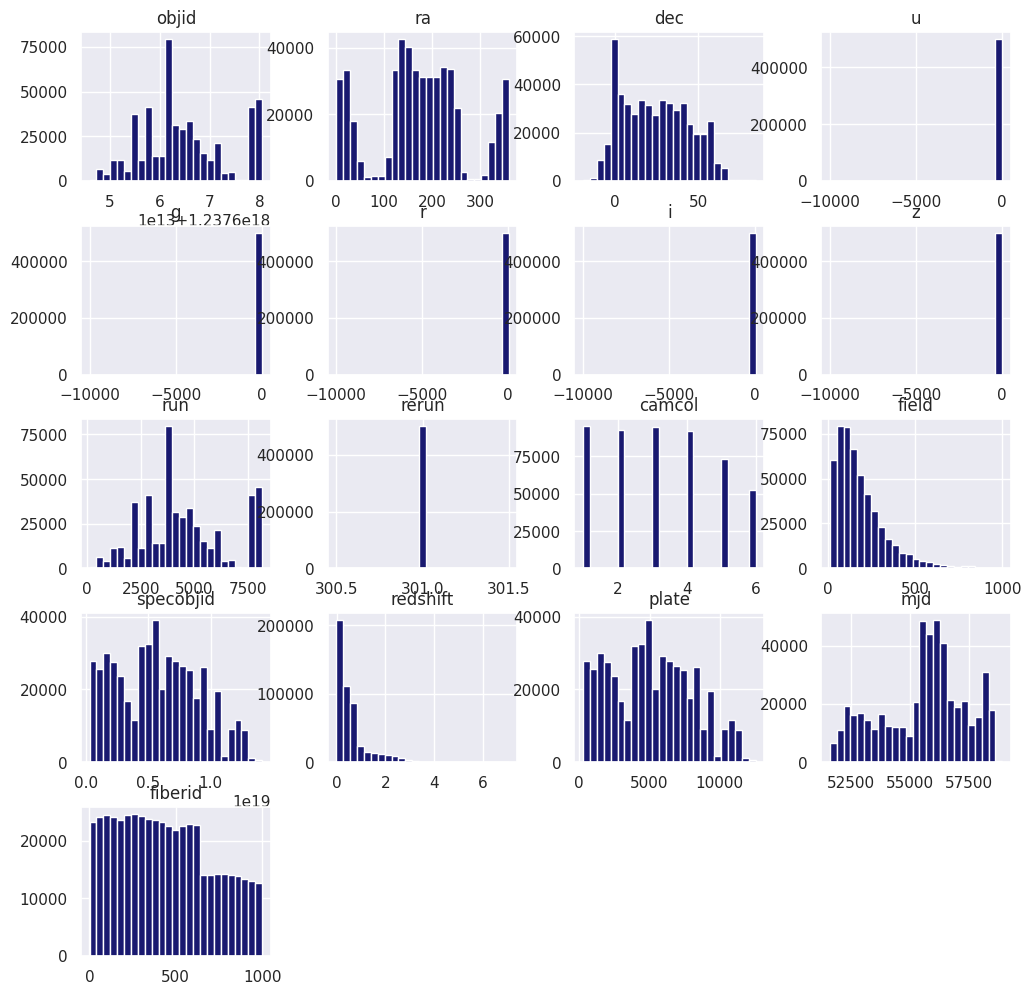

In [ ]:
df.hist(bins=25,figsize=(12,12),color='midnightblue')
plt.show()

# Feature Selection

In [ ]:
X=df[['u','g','r','i','z','redshift','plate']]
X

,u,g,r,i,z,redshift,plate
0,21.43812,20.14254,19.53728,19.27723,19.11268,-0.000848,2194
1,23.92653,22.86720,21.38509,20.37984,19.71321,0.645810,8223
2,25.66283,21.77463,19.96837,19.10381,18.61791,0.556863,7449
3,21.32821,21.11290,19.40331,18.65184,18.21766,1.788380,5811
4,22.02962,21.37774,21.52691,21.45392,20.66333,2.134945,4667
...,...,...,...,...,...,...,...
499995,18.45376,18.42383,18.09534,18.01964,18.08926,1.302137,853
499996,20.46008,18.26922,17.09587,16.53841,16.12926,0.131870,5494
499997,23.15937,21.45879,19.98819,18.93842,18.51256,0.533656,4618
499998,22.86058,22.54106,20.81388,19.34300,18.70605,0.763790,4653


In [ ]:
Y=df['class']
Y

0           b'STAR'
1         b'GALAXY'
2         b'GALAXY'
3            b'QSO'
4            b'QSO'
            ...    
499995       b'QSO'
499996    b'GALAXY'
499997    b'GALAXY'
499998    b'GALAXY'
499999      b'STAR'
Name: class, Length: 500000, dtype: object

# Encoding

In [ ]:
#encoder={'GALAXY':1,'STAR':0,'QSO':2}
#df['class']=df['class'].map(encoder)

In [ ]:
#df['class'].value_counts()

In [ ]:
# We can also use scikit learn for this
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Y=LE.fit_transform(Y)

In [ ]:
Y

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# GALAXY= 0
# QSO   = 1
# STAR  = 2

In [ ]:
df['class'].value_counts()

b'GALAXY'    305770
b'STAR'      101436
b'QSO'        92794
Name: class, dtype: int64

# Resampling

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, Y_res = sm.fit_resample(X, Y)

In [ ]:
#Y_res.value_counts()

# Splitting Datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res,Y_res,test_size=0.25,random_state=30)

In [ ]:
X_train

,u,g,r,i,z,redshift,plate
128649,24.595700,23.415440,22.332560,20.667540,19.940770,0.505238,7865
663030,21.739185,21.273183,21.211598,21.178568,20.992267,1.756283,7092
828982,23.094898,20.609824,19.109276,18.299507,17.801731,-0.000235,3145
843635,21.902869,21.154824,20.663706,20.498956,20.529777,0.000358,11106
128997,24.717550,22.746270,20.859310,19.547200,18.950200,0.622920,5207
...,...,...,...,...,...,...,...
328599,26.135060,23.372060,21.406640,20.345280,19.629190,0.541360,7681
570508,19.202929,18.357836,18.246812,18.144262,18.057715,2.701635,7101
885236,24.957571,22.052635,20.552101,19.648585,19.229341,-0.000199,4776
572333,20.667422,19.613172,19.499843,19.500782,19.566002,2.824432,5284


In [ ]:
y_train

array([0, 1, 2, ..., 2, 1, 1])

# Classification Algorithms

In [ ]:
# Creating a dataframe to store the accuracy scores of all the classification algorithms so that we are able to choose the best one

score_df=pd.DataFrame(columns=['Algorithm','Recall_Score'])

## Logistic Regression

In [ ]:
# Training the ML model

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_pred1=model.predict(X_test)

Text(46.25, 0.5, 'Prediction')

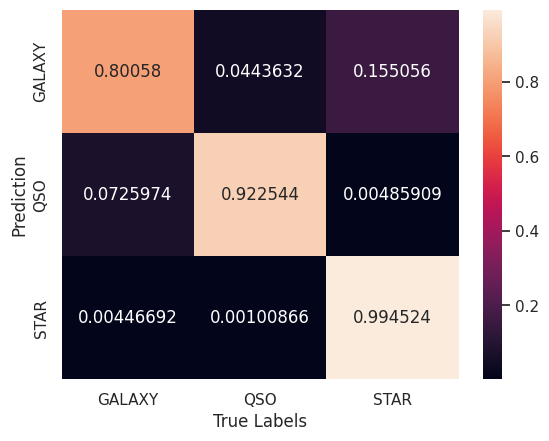

In [ ]:
# Generating the confusion matrix

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred1,normalize='true')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [ ]:
# Getting the Recall score

from sklearn.metrics import recall_score
LR_score=recall_score(y_test,y_pred1,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Logistic Regression','Recall_Score':LR_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.905637


## Decision Tree

In [ ]:
# Training the ML model

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='gini',random_state=30)
model.fit(X_train,y_train)

y_pred2=model.predict(X_test)

Text(46.25, 0.5, 'Prediction')

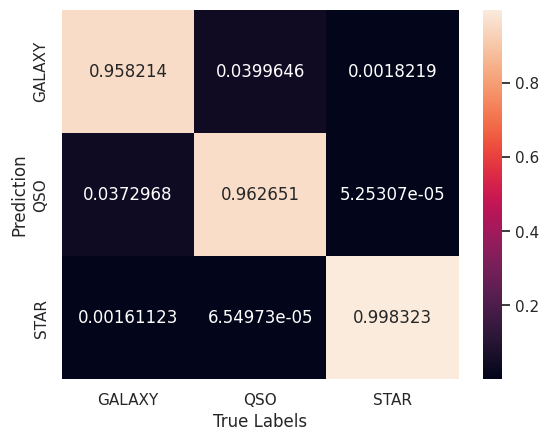

In [ ]:
# Generating the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred2,normalize='true')

sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [ ]:
# Getting the Recall score

from sklearn.metrics import recall_score
dt_score=recall_score(y_test,y_pred2,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Decision Tree','Recall_Score':dt_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.905637
1,Decision Tree,0.973039


## Random Forest

In [ ]:
# First, we'll create a dataframe where we'll store recall score of random forest algorithm with different values of n_estimators
# Then, we'll choose the maximum one and consider that as the recall score

rf_df=pd.DataFrame(columns=['Estimators','Recall score'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

for i in range(1,31):
  model=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=30)
  model.fit(X_train,y_train)
  y_pred3=model.predict(X_test)
  rf_df=rf_df.append({'Estimators':i,'Recall score':recall_score(y_test,y_pred3,average='weighted')},ignore_index=True)


In [ ]:
rf_df

,Estimators,Recall score
0,1.0,0.968900
1,2.0,0.970239
2,3.0,0.978699
3,4.0,0.979614
4,5.0,0.980822
5,6.0,0.981058
6,7.0,0.981768
7,8.0,0.981864
8,9.0,0.982222
9,10.0,0.982344


In [ ]:
# Sorting

rf_df=rf_df.sort_values(by='Recall score',ascending=False)
rf_df.head()

,Estimators,Recall score
28,29.0,0.983103
29,30.0,0.983055
27,28.0,0.983042
24,25.0,0.982989
26,27.0,0.982959


The above table shows that the recall score is highest for n=29.0. So we'll keep n_estimators=29.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=29,random_state=30)
model.fit(X_train,y_train)
y_pred3=model.predict(X_test)

from sklearn.metrics import recall_score
rf_score=recall_score(y_test,y_pred3,average='weighted')
rf_score

0.9831028047163888

In [ ]:
# Adding accuracy to the data frame
score_df=score_df.append({'Algorithm':'Random Forest','Recall_Score':rf_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.905637
1,Decision Tree,0.973039
2,Random Forest,0.983103


Text(46.25, 0.5, 'Prediction')

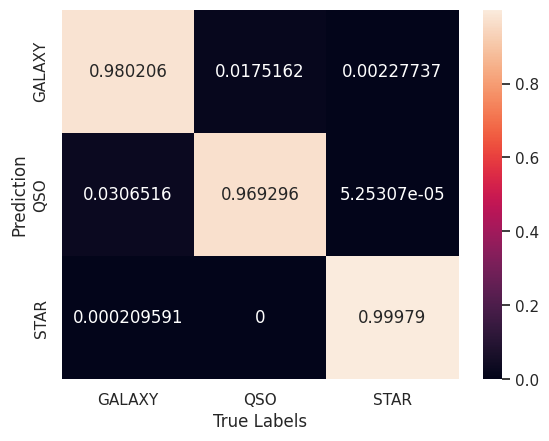

In [ ]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix

cm_rf=confusion_matrix(y_test,y_pred3,normalize='true')

sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

## KNN

In [ ]:
# We'll create a dataframe to store recall score of K Neighbour Classifiers with different n_neighbour values.
# From there, we shall choose the maximum one and consider that as recall score for KNN algo.

knn_df=pd.DataFrame(columns=['Neighbors','Recall Score'])

In [ ]:
# Algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

for i in range(1,31):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred4=model.predict(X_test)
  knn_df=knn_df.append({'Neighbors':i,'Recall Score':recall_score(y_test,y_pred4,average='weighted')},ignore_index=True)

knn_df

,Neighbors,Recall Score
0,1.0,0.950316
1,2.0,0.936510
2,3.0,0.938163
3,4.0,0.931094
4,5.0,0.930501
5,6.0,0.925395
6,7.0,0.924641
7,8.0,0.920241
8,9.0,0.919234
9,10.0,0.916094


In [ ]:
knn_df=knn_df.sort_values(by='Recall Score',ascending=False)
knn_df.head()

,Neighbors,Recall Score
0,1.0,0.950316
2,3.0,0.938163
1,2.0,0.936510
3,4.0,0.931094
4,5.0,0.930501


Here, we see the recall score is maximum for n=3.0 Hence, we will choose n=3.0

In [ ]:
# KNN algo for n_neighbors=3.0

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred4=model.predict(X_test)

from sklearn.metrics import recall_score
knn_score=recall_score(y_test,y_pred4,average='weighted')
print(knn_score)

0.93816280611177


In [ ]:
score_df=score_df.append({'Algorithm':'KNN','Recall_Score':knn_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.905637
1,Decision Tree,0.973039
2,Random Forest,0.983103
3,KNN,0.938163


Text(46.25, 0.5, 'Prediction')

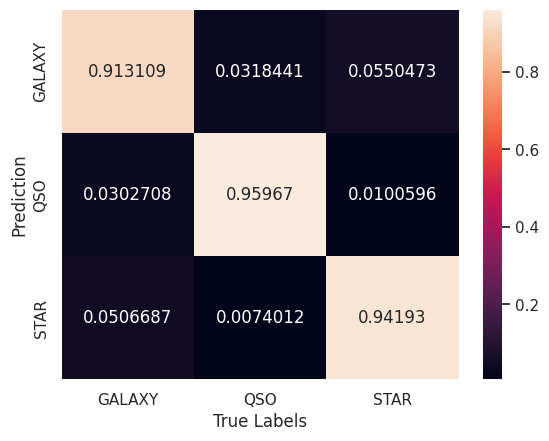

In [ ]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_knn=confusion_matrix(y_test,y_pred4,normalize='true')

sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

## SVM

# Neural Networks

## Artificial Neural Network(ANN)

First, we shall do th feature selection again

### Feature Selection

In [ ]:
Xr=df[['u','g','r','i','z','redshift','plate']]
yr=df['class']

Here, we need to reencode the class as follows.

### Re-encode

In [ ]:
from keras.utils import to_categorical
l_encode=LabelEncoder()
l_encode.fit(yr)
Yr=l_encode.transform(yr)
Yr=to_categorical(Yr)

Resampling the data

### Resampling the data


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_r, Y_r = sm.fit_resample(Xr, Yr)

Now, we shall split to training and testing data set

### Splitting to training and testing data set

In [ ]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test= train_test_split(X_r,Y_r,test_size=0.25,random_state=210)

In [ ]:
Xr_train.shape,Xr_test.shape,yr_train.shape,yr_test.shape

((687982, 7), (229328, 7), (687982, 3), (229328, 3))

Now, we shall make the model. For that we have to import th following

### Making the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

Now, we shall start with the model.

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_dim=Xr_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(48,activation='relu'),
    #tf.keras.layers.Dense(32,activation='relu'),
    #tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 48)                6192      
                                                                 
 dense_2 (Dense)             (None, 3)                 147       
                                                                 
Total params: 7363 (28.76 KB)
Trainable params: 7363 (28.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xr_train,yr_train,validation_data=(Xr_test,yr_test),epochs=40,verbose=0)

<Axes: >

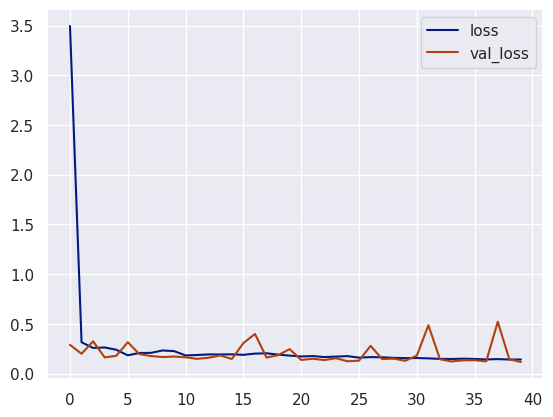

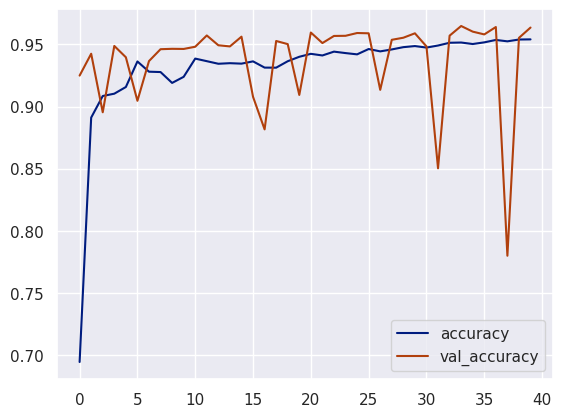

In [ ]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

### Evaluating the model's accuracy

In [ ]:
y_pred6=np.round(model.predict(Xr_test))

In [ ]:
y_pred6

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import recall_score

ann_score=recall_score(yr_test,y_pred6,average='weighted')
ann_score

0.9635674666852717

In [ ]:
score_df=score_df.append({'Algorithm':'ANN','Recall_Score':ann_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.905637
1,Decision Tree,0.973039
2,Random Forest,0.983103
3,KNN,0.938163
4,ANN,0.963567


In [ ]:
score_df.sort_values(by='Recall_Score')
score_df.head()

,Algorithm,Recall_Score
0,Logistic Regression,0.905637
1,Decision Tree,0.973039
2,Random Forest,0.983103
3,KNN,0.938163
4,ANN,0.963567


In [ ]:
y_pred6.shape

(229328, 3)

In [ ]:
yr_test

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
#confusion_matrix(preds2.argmax(axis = 1), yr_test.argmax(axis = 1))

#plt.figure(figsize = (6,6))
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_predictions(yr_test.argmax(axis = 1), y_pred6.argmax(axis = 1), display_labels = ['GALAXY', 'QUASAR', 'STAR'])

Text(46.25, 0.5, 'Prediction')

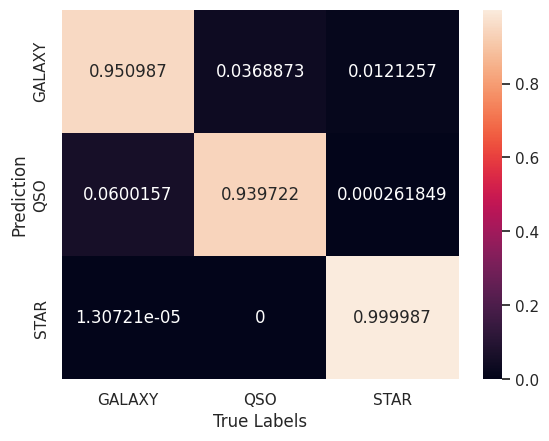

In [ ]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_ann=confusion_matrix(yr_test.argmax(axis=1),y_pred6.argmax(axis=1),normalize='true')

sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

## CNN

### Feature selection

In [16]:
Xr=df[['u','g','r','i','z','redshift','plate']]
yr=df['class']

### Re-encode

In [17]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
l_encode=LabelEncoder()
l_encode.fit(yr)
Yr=l_encode.transform(yr)
Yr=to_categorical(Yr)

### Resampling the data

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_r, Y_r = sm.fit_resample(Xr, Yr)

### Splitting and training the dataset

In [19]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test= train_test_split(X_r,Y_r,test_size=0.25,random_state=210)

### Making the model

In [20]:
from tensorflow.keras.layers import Dense, BatchNormalization, Reshape, Flatten, Dropout, Conv1D
from tensorflow.keras.models import Sequential

In [23]:
model_cnn = Sequential(
    [Reshape((1, Xr_train.shape[1],1)),
     Conv1D(filters=10, kernel_size=2, activation='relu',
            input_shape = (1,Xr_train.shape[1],1)),
     Conv1D(filters=10, kernel_size=2, activation='relu'),
     Flatten(),
     Dense(3, activation = 'softmax')
                     ])

### Compiling the Model

In [25]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

model_cnn.fit(Xr_train, yr_train, validation_data=(Xr_test, yr_test), epochs = 40, verbose=0)

### Plotting the accuracy

<Axes: >

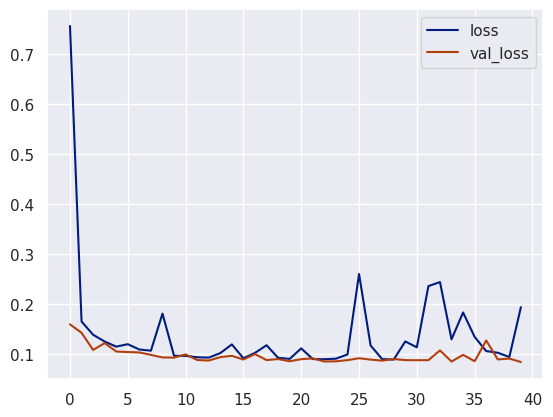

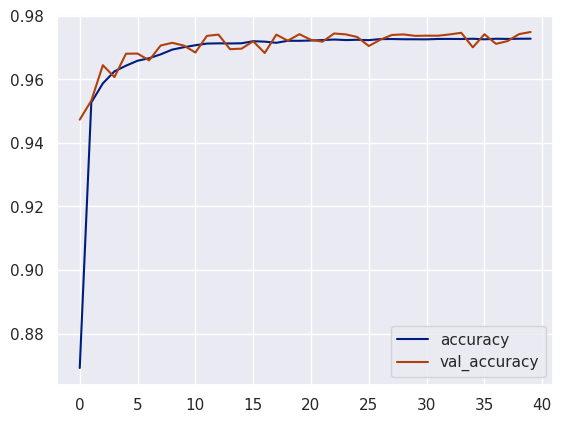

In [27]:
model_cnn_loss_acc = pd.DataFrame(model_cnn.history.history)
model_cnn_loss_acc[['loss', 'val_loss']].plot()
model_cnn_loss_acc[['accuracy', 'val_accuracy']].plot()

### Evaluating the Model's accuracy

In [29]:
y_pred7=np.round(model_cnn.predict(Xr_test))

7167/7167 [==============================] - 22s 3ms/step


In [30]:
from sklearn.metrics import recall_score

cnn_score=recall_score(yr_test,y_pred7,average='weighted')
cnn_score

0.9748276568747575

In [ ]:
score_df=score_df.append({'Algorithm':'ANN','Recall_Score':cnn_score},ignore_index=True)
score_df

In [ ]:
score_df.sort_values(by='Recall_Score')
score_df.head()

Text(46.25, 0.5, 'Prediction')

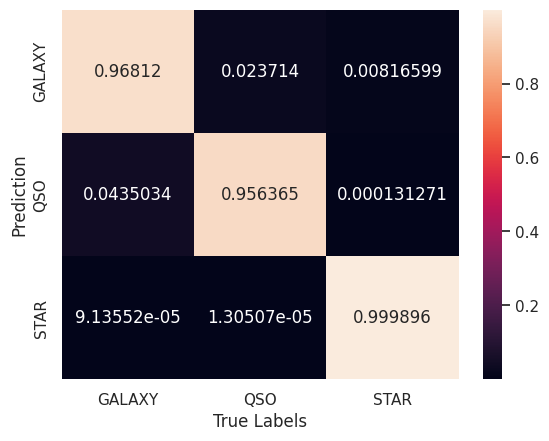

In [31]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_cnn=confusion_matrix(yr_test.argmax(axis=1),y_pred7.argmax(axis=1),normalize='true')

sns.heatmap(cm_cnn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

# Comparing all the algorithms

Text(153.75, 0.5, 'Prediction')

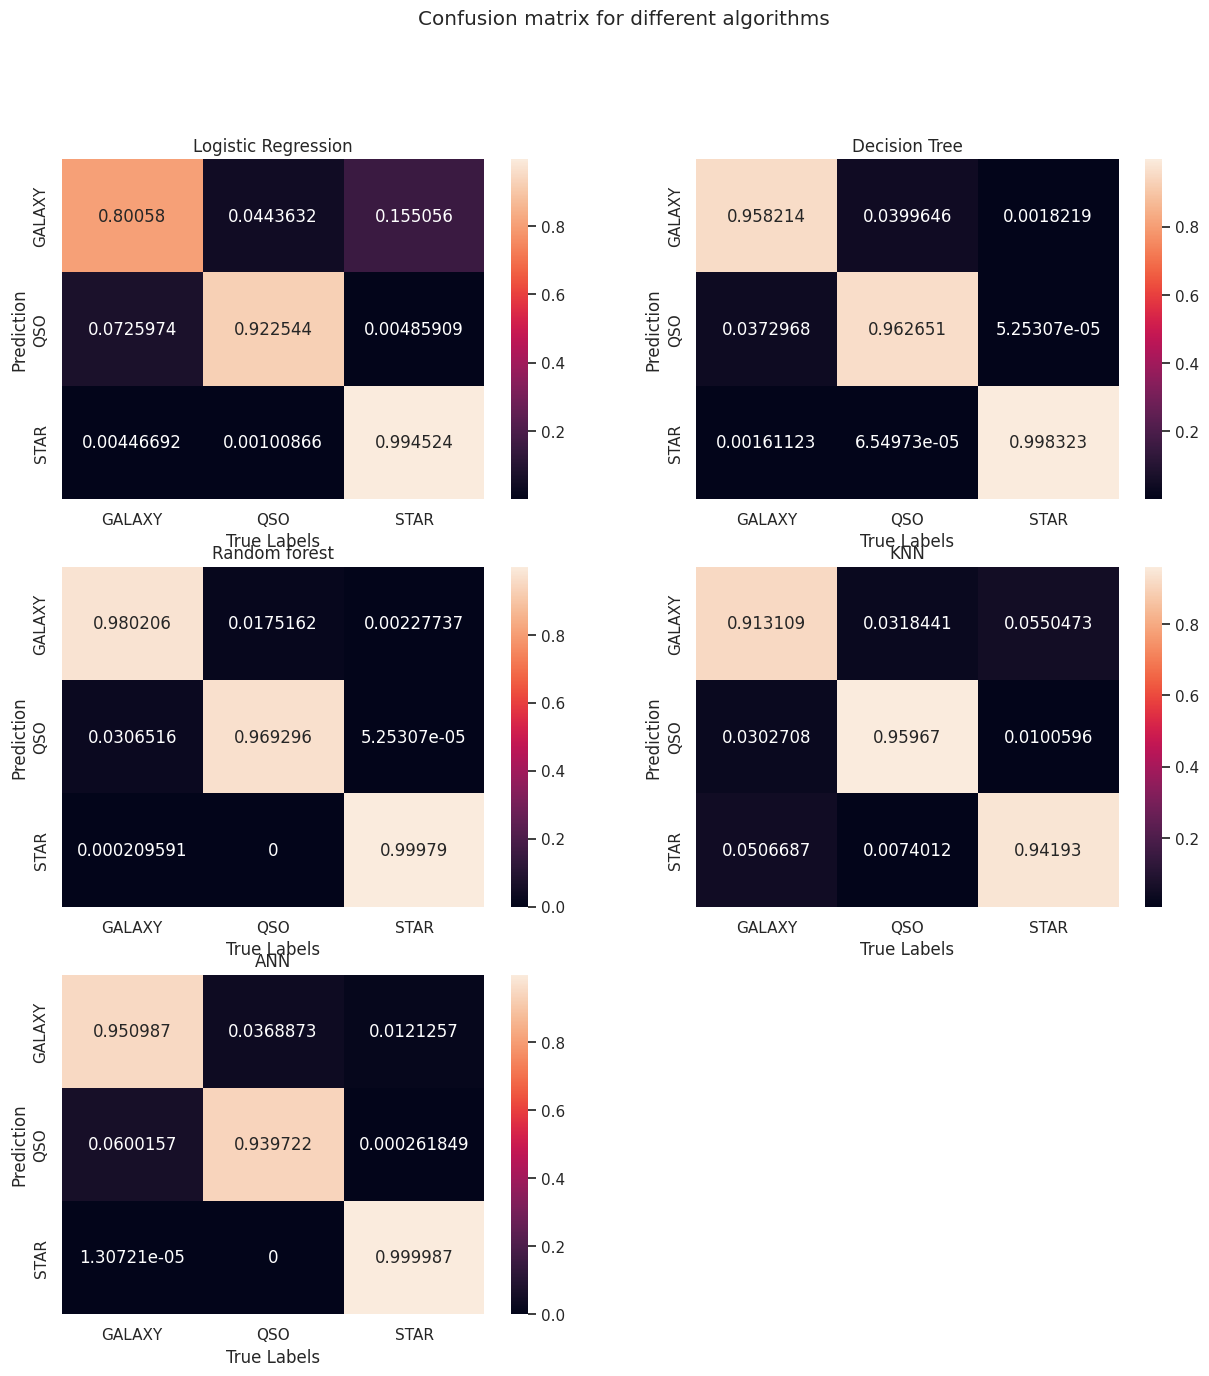

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Confusion matrix for different algorithms')

plt.subplot(321)
plt.title('Logistic Regression')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(322)
plt.title('Decision Tree')
sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(323)
plt.title('Random forest')
sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(324)
plt.title('KNN')
sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(325)
plt.title('ANN')
sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')